In [1]:
# Importing packages
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
#creating dataframe
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names) 
x = iris_df.iloc[:, :-1].values #last column values excluded
y = iris_df.iloc[:,   -1].values #last column value

In [5]:
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


[[5.84655172 2.73275862 4.3637931 ]
 [5.006      3.428      1.462     ]
 [6.83571429 3.06428571 5.6547619 ]]


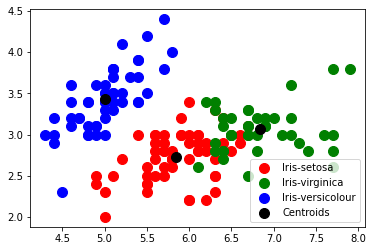

In [6]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', 
                max_iter = 100, 
                n_init = 10, 
                random_state = 0)

y_kmeans = kmeans.fit_predict(x)
print(kmeans.cluster_centers_) #display cluster centers

import matplotlib.pyplot as plt
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

k-means++: we have used ‘k-means++’ as a method for initialization rather than ‘random’. These algorithms are used to choose initial values for K-means clustering. k-means++ uses a smarter way to initialize the centroids for better clustering.

Source: https://www.analyticsvidhya.com/blog/2021/06/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/

C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


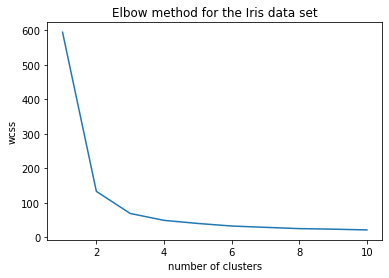

In [7]:
wcss = []

#Iterating over 1, 2, 3, ---- 10 clusters
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) # intertia_ is an attribute that has the wcss number
plt.plot(range(1,11), wcss)
plt.title("Elbow method for the Iris data set")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [ ]:
# Silhouette Score

from sklearn.metrics import silhouette_score
n_clusters_options = [1,2,3,4]#range(1,11)
silhouette_scores = []
for i, n_clusters in enumerate(n_clusters_options):
    kmeans = KMeans(n_clusters=n_clusters, random_state=7)
    y_pred = kmeans.fit_predict(x)
    silhouette_scores.append(silhouette_score(x, y_pred))
    
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharey=False)
pd.DataFrame(
    {
        'n_clusters': n_clusters_options,
        'silhouette_score': silhouette_scores,
    }).set_index('n_clusters').plot(
    title='KMeans: Silhouette Score vs # Clusters chosen',
    kind='bar',
    ax=ax
)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Load data
iris = datasets.load_iris()
features = iris.data
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
# Create k-mean object
cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
# Train model
model = cluster.fit(features_std)

C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


## Using Mini-batch KMeans

MiniBatchKMeans works similarly to KMeans, with one significant difference: the
batch_size parameter. batch_size controls the number of randomly selected observations
in each batch. The larger the size of the batch, the more computationally
costly the training process.

In [9]:
from sklearn.cluster import MiniBatchKMeans
# Load data
iris = datasets.load_iris()
features = iris.data
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
# Create k-mean object
cluster = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)
# Train model
model = cluster.fit(features_std)

C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


## Using Mini-Shift

In [10]:
from sklearn.cluster import MeanShift
# Load data
iris = datasets.load_iris()
features = iris.data
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
# Create meanshift object
cluster = MeanShift(n_jobs=-1)
# Train model
model = cluster.fit(features_std)


## Agglomerative clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
# Load data
iris = datasets.load_iris()
features = iris.data
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
# Create meanshift object
cluster = AgglomerativeClustering(n_clusters=3)
# Train model
model = cluster.fit(features_std)

In scikit-learn, AgglomerativeClustering uses the
linkage parameter to determine the merging strategy to minimize the following:
1. Variance of merged clusters (ward)
2. Average distance between observations from pairs of clusters (average)
3. Maximum distance between observations from pairs of clusters (complete)